# Análisis del rendimiento de auditorias internas

**Por Constanza Espinoza**

Dataset analiza rendimiento de auditorias internas realizadas a los distintos contratos de la organización durante el actual año


## Objetivo 
El objetivo de este análisis es responder a una serie de preguntas a través del estudio de la base de datos. Las preguntas son las siguientes:
 - ¿Existe alguna tendencia de resultados entre los distintos contratos frente a las distintas auditorias?
 - ¿Hubo un aumento significativo en el cumplimiento frente al plazo entregado?
 - ¿Cúal o cuales fueron los contratos que mejor resultado tuvieron?, ¿Y los peores?
 - ¿Cúal auditoria tuvo mejores resultados?, ¿y la peor?
 - ¿Qué topicos auditados tuvieron mejores resultados?, ¿y los peores?

 
 ## Tabla de contenido
  1. Carga de datos
  2. Exploración de datos
  3. Limpieza de datos
  4. Presentación de datos
  5. Conclusiones

  
## 1. Carga de datos
Se cargaron los datos a partir de una planilla en la que se mantenia seguimiento de los resultados obtenidos en las distintas auditorias realizadas en el actual año. Auditorias enfocadas en salud ocupacional, seguridad, calidad y medio ambiente.

In [168]:
#Importar librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [169]:
#Importar los datos a utilizar
df = pd.read_csv('datos/rendimiento.csv')

## 2. Exploración de datos
Se revisaron los datos cargados para determinar que se debe realizar en el siguiente paso

In [170]:
#Revisar comportamiento de columnas
df.sample(10)

,Servicio,Region,Auditoria,Categoria,Subgerencia,Requisito,Cumplimiento parcial,Cumplimiento final,Nc preliminar,NC definitivas,NC tratadas
207,Casa Matriz,Metropolitana,Seguridad,B,Victor Zañartu,Identificacion Peligros y Evaluacion de Riesgos,100%,100%,0,0,0
432,Casa Matriz,Metropolitana,Medio ambiente,B,Victor Zañartu,Objetivos de Medio Ambiente,63%,100%,2,0,2
342,INCO,Atacama y Coquimbo,Calidad,B,Elias Matamoro,Control Documental,100%,100%,0,0,0
92,INCO,Atacama y Coquimbo,Higiene y Salud Ocupacional,B,Elias Matamoros,RUV,85%,100%,3,0,3
417,Anglo American,Metropolitana,Medio ambiente,A,Elias Matamoro,Identificación Aspectos e Impactos Ambientales,75%,100%,1,0,1
216,Casa Matriz,Metropolitana,Seguridad,B,Victor Zañartu,Elementos de protección personal,80%,100%,1,0,1
185,Cerro Negro,Atacama y Coquimbo,Seguridad,B,Elias Matamoro,Preparacion y Respuesta Ante Emergencias,85%,100%,2,0,2
401,Cerro Colorado,Tarapaca,Medio ambiente,B,Hector Figueroa,Control Documental,100%,100%,0,0,0
27,Spence,Antofagasta,Higiene y Salud Ocupacional,A,Mauricio Aguilera,Silice,62%,81%,8,5,3
309,Spence,Antofagasta,Calidad,A,Mauricio Aguilera,Auditorías,75%,75%,1,1,0


In [171]:
df.info()
#No hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Servicio              441 non-null    object
 1   Region                441 non-null    object
 2   Auditoria             441 non-null    object
 3   Categoria             441 non-null    object
 4   Subgerencia           441 non-null    object
 5   Requisito             441 non-null    object
 6   Cumplimiento parcial  441 non-null    object
 7   Cumplimiento final    441 non-null    object
 8   Nc preliminar         441 non-null    int64 
 9   NC definitivas        441 non-null    int64 
 10  NC tratadas           441 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 38.0+ KB


In [172]:
df.shape
#441 filas y 11 columnas

(441, 11)

In [173]:
#revisar valores unicos
df.nunique()
#De acuerdo a revisión, se auditaron 20 contratos, distribuidos en 6 regiones

Servicio                20
Region                   6
Auditoria                4
Categoria                2
Subgerencia              7
Requisito               47
Cumplimiento parcial    48
Cumplimiento final      38
Nc preliminar           12
NC definitivas           9
NC tratadas              9
dtype: int64

In [23]:
#ver las variables definidas
#%whos
#import math para importar operaciones matematicas


In [177]:
df['Subgerencia'].describe()
#De acuerdo a la revisión, son 4 subgerentes, sin embargo, el dataset muestra 7
#Se debe modificar columna'

count                441
unique                 7
top       Elias Matamoro
freq                 116
Name: Subgerencia, dtype: object

In [178]:
df['Subgerencia'].unique()
#Se evidencia que Elias, Mauricio y Victor se repite dos veces
#Se debe quitar el espacio del final de la palabra de Mauricio y Victor y modificar Matamoro a Matamoros

array(['Hector Figueroa', 'Mauricio Aguilera ', 'Elias Matamoros',
       'Victor Zañartu ', 'Elias Matamoro', 'Victor Zañartu',
       'Mauricio Aguilera'], dtype=object)

In [175]:
df['Region'].describe()
#De acuerdo a revisión, se mantienen 6 regiones unicas, sin embargo, no es así

count             441
unique              6
top       Antofagasta
freq              140
Name: Region, dtype: object

In [176]:
df['Region'].unique()
#Se evidencia que la región Metropolitana se repite 2 veces
#Se debe quitar el espacio del final de la palabra de Metropolitana

array(['Tarapaca', 'Antofagasta', 'Atacama y Coquimbo', 'Metropolitana',
       'Bio Bio', 'Metropolitana '], dtype=object)

In [179]:
df.NC tratadas.sum()
#No se puede sumar columnas con nombres separados, se debe modificar el nombre de columnas 

SyntaxError: invalid syntax (<ipython-input-179-51ede4d545a7>, line 1)

In [180]:
df.isnull().values.any()
#Efectivamente no hay valores unicos

False

## 3. Limpieza de los datos
En base a la exploración de los datos, se decide realizar una limpieza con el fin de realizar un análisis eficaz

Limpiar:
- Columna Subgerentes
- Columna Region
- Modificar nombre separados de columnas 

In [184]:
# 1. Reemplazar valor nulo por subgerente "Mauricio Aguilera"
df.Subgerencia.replace('Elias Matamoro','Elias Matamoros')

0      Hector Figueroa
1      Hector Figueroa
2      Hector Figueroa
3      Hector Figueroa
4      Hector Figueroa
            ...       
436    Victor Zañartu 
437    Victor Zañartu 
438    Victor Zañartu 
439    Victor Zañartu 
440    Victor Zañartu 
Name: Subgerencia, Length: 441, dtype: object

In [185]:
df['Subgerencia'].describe()

count                441
unique                 7
top       Elias Matamoro
freq                 116
Name: Subgerencia, dtype: object

In [ ]:
# 2. Modificar región

In [96]:
# 3. Modificar el nombre de las columnas
df = df.rename(columns={'Cumplimiento parcial': 'cumplimiento_parcial'})
df = df.rename(columns={'Cumplimiento final': 'cumplimiento_final'})
df = df.rename(columns={'Nc preliminar': 'NC_preliminar'})
df = df.rename(columns={'NC definitivas': 'NC_definitivas'})
df = df.rename(columns={'NC tratadas': 'NC_tratadas'})

In [14]:
df.columns

Index(['Servicio', 'Region', 'Auditoria', 'Categoria', 'Subgerencia',
       'Requisito', 'cumplimiento_parcial', 'cumplimiento_final',
       'NC_preliminar', 'NC_definitivas', 'NC_tratadas'],
      dtype='object')

## 4. Presentación de datos
De acuerdo al análisis y limpieza de los datos, se realiza lo siguiente:


In [186]:
df['Region'].value_counts()
#Se audita a mas contratos de la ciudad de Antofagasta

Antofagasta           140
Tarapaca              103
Atacama y Coquimbo     83
Metropolitana          42
Bio Bio                38
Metropolitana          35
Name: Region, dtype: int64

In [187]:
df['Servicio'].value_counts()
#El contrato mas auditado es Spence y el menos auditado es Magnetita

Spence              40
Cerro Colorado      39
El Peñon            38
Anglo American      38
INCO                37
Quebrada Blanca     31
CMPC                31
Casa Matriz         31
Geologia            23
Cerro Negro         20
CDA                 20
Geologia            18
SGO                 13
Quebrada Blanca     13
Lavanderia          13
SGO                  8
Casa Matriz          8
CMPC                 7
Lavanderia           7
Magnetita            6
Name: Servicio, dtype: int64

In [142]:
df['Auditoria'].value_counts()
#Se solicitan mas requisitos o topicos que evidenciar en la auditoria de Seguridad y 
#en la que menos se consulta es la de medio ambiente

Seguridad                      168
Higiene y Salud Ocupacional    116
Calidad                         90
Medio ambiente                  67
Name: Auditoria, dtype: int64

## Los datos generales de análisis son:
- Los contratos que mas se auditaron en el año pertenecen a la ciudad de Antofagasta
- El contrato en que más requisitos se auditaron fue en Spence y el menos en Magnetita. Es de esperarse porque Magnetita solo fue auditado 2 veces y Spence 4.
- Donde más se revisaron requisitos es en la auditoria de Seguridad

# 4.1 ¿Existe alguna tendencia de resultados entre los distintos contratos frente a las distintas auditorias?

In [63]:
df['Servicio'].unique()

array(['Cerro Colorado', 'SGO', 'El Peñon', 'Spence', 'Geologia ',
       'Magnetita', 'Cerro Negro', 'CDA', 'Casa Matriz', 'Anglo American',
       'CMPC', 'INCO', 'Quebrada Blanca ', 'Lavanderia ', 'SGO ',
       'Quebrada Blanca', 'Lavanderia', 'Geologia', 'Casa Matriz ',
       'CMPC '], dtype=object)

In [88]:
#Analizar por contrato y auditoria
df.groupby(["Servicio","Auditoria"])['NC_preliminar'].sum()

Servicio          Auditoria                  
Anglo American    Calidad                         6
                  Higiene y Salud Ocupacional     7
                  Medio ambiente                  1
                  Seguridad                       5
CDA               Higiene y Salud Ocupacional    41
                  Seguridad                      21
CMPC              Calidad                         5
                  Higiene y Salud Ocupacional    20
                  Seguridad                       1
CMPC              Medio ambiente                  2
Casa Matriz       Higiene y Salud Ocupacional    23
                  Medio ambiente                 10
                  Seguridad                      11
Casa Matriz       Calidad                        13
Cerro Colorado    Calidad                         0
                  Higiene y Salud Ocupacional     9
                  Medio ambiente                  0
                  Seguridad                       1
Cerro Negro       

Se tomó una muestra para revisar el comportamiento y se obtuvo lo siguiente:
1. Anglo Amercian: como se observa en la tabla, el contrato mantuvo no conformidades en un rango parecido, es decir, le fue bien en todas las auditorias (por las bajas NC).
2. CMPC: mantiene un rango promedio, la auditoria de Higiene mantiene un valor mas alto en comparación a las otras.
3. El Peñon: mantiene el mismo rango de resultados en todas las auditorias.
3. INCO: mantiene un rango promedio con NC mas altas, sin embargo le va mejor en la auditoria de Medio Ambiente. 
4. Quebrada Blanca: contrato tiene resultados altos, a excepción de la auditoria de Medio Ambiente.
5. Geologia: mantiene un rango alto de NC, donde mejor le va es en la auditoria de Medio Ambiente


**Respuesta: existe un patrón. De acuerdo a la revisión aleatoria, los contratos o les va bien en todas o en ninguna (comparando entre NC) permitiendo evaluar la gestión de los administradores de cada contrato. Otro patrón destacable es el rango de NC por auditorias, donde mas NC hubieron fue en la auditoria de Higiene y en la que mejores resultados demostraton fue en la de medio ambiente.**

# 4.2 ¿Hubo un aumento significativo en el cumplimiento frente al plazo entregado?

In [241]:
df.NC_definitivas.sum()

235

In [239]:
df.NC_preliminar.sum()

615

In [97]:
df.NC_tratadas.sum()
#Se trataton 372 no conformidades de acuerdo al plazo entregado para enviar evidencias (6 días)

372

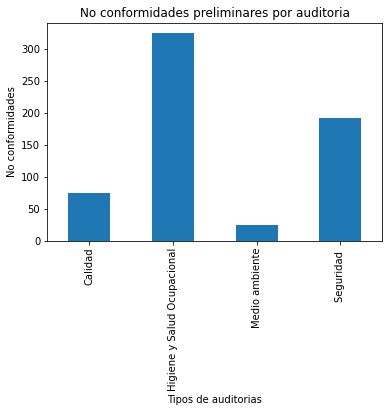

In [153]:
auditoriastodas = df.groupby('Auditoria')['NC_preliminar'].sum()
auditoriastodas = auditoriastodas.plot.bar()
auditoriastodas.plot()
plt.title('No conformidades preliminares por auditoria')
plt.ylabel('No conformidades')
plt.xlabel('Tipos de auditorias');

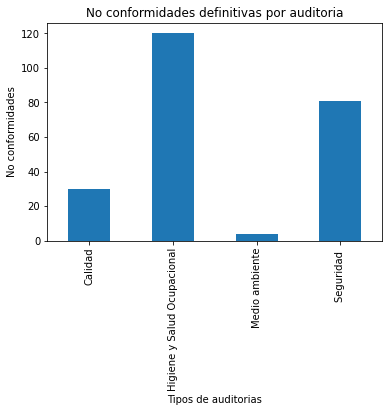

In [158]:
auditoriastodas = df.groupby('Auditoria')['NC_definitivas'].sum()
auditoriastodas = auditoriastodas.plot.bar()

auditoriastodas.plot()
plt.title('No conformidades definitivas por auditoria')
plt.ylabel('No conformidades')
plt.xlabel('Tipos de auditorias');

El grafico demuestra la diferencia entre las NC preliminares y las definitivas por tipo de auditoria. Como se observa en el eje de las y, hubo una disminución considerable de NC en todas las auditorias

**Respuesta Dentro del plazo se recolectaron 615 no conformidades y se mantuvieron 235 como definitivas, es decir, se trataron 372, por lo tanto, hubo una eficiencia de 62% en incorporar nueva metodologia (plazo)**

# 4.3 ¿Cúal o cuales fueron los contratos que mejor resultado tuvieron?, ¿Y los peores?

In [167]:
df.groupby(["Servicio","Auditoria"])['NC_preliminar'].sum()


Servicio          Auditoria                  
Anglo American    Calidad                         6
                  Higiene y Salud Ocupacional     7
                  Medio ambiente                  1
                  Seguridad                       5
CDA               Higiene y Salud Ocupacional    41
                  Seguridad                      21
CMPC              Calidad                         5
                  Higiene y Salud Ocupacional    20
                  Seguridad                       1
CMPC              Medio ambiente                  2
Casa Matriz       Higiene y Salud Ocupacional    23
                  Medio ambiente                 10
                  Seguridad                      11
Casa Matriz       Calidad                        13
Cerro Colorado    Calidad                         0
                  Higiene y Salud Ocupacional     9
                  Medio ambiente                  0
                  Seguridad                       1
Cerro Negro       

In [148]:
df.groupby(["Servicio","Auditoria"])['NC_tratadas'].sum()

Servicio          Auditoria                  
Anglo American    Calidad                         6
                  Higiene y Salud Ocupacional     7
                  Medio ambiente                  1
                  Seguridad                       5
CDA               Higiene y Salud Ocupacional     0
                  Seguridad                       6
CMPC              Calidad                         0
                  Higiene y Salud Ocupacional    20
                  Seguridad                       1
CMPC              Medio ambiente                  0
Casa Matriz       Higiene y Salud Ocupacional    19
                  Medio ambiente                  9
                  Seguridad                      11
Casa Matriz       Calidad                        11
Cerro Colorado    Calidad                         0
                  Higiene y Salud Ocupacional     9
                  Medio ambiente                  0
                  Seguridad                       1
Cerro Negro       

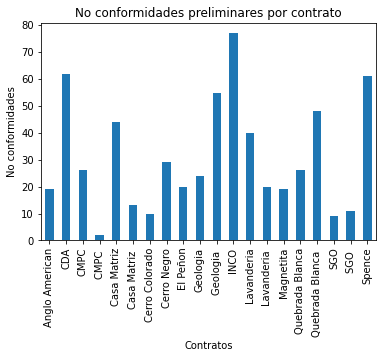

In [154]:
serviciostodas = df.groupby(["Servicio"])['NC_preliminar'].sum()
serviciostodas = serviciostodas.plot.bar()
serviciostodas.plot()
plt.title('No conformidades preliminares por contrato')
plt.ylabel('No conformidades')
plt.xlabel('Contratos');

Lo anterior entrega los siguientes resultados: 
1. Los contratos con menos no conformidades: CMPC con 2, SGO con 9 y Cerro Colorado con 10.
2. Los contratos con mas no conformidades: INCO con 77, CDA con 62 y Spence con 61.
3. Los contratos con mas no conformidades tratadas: INCO con 46, Geologia con 41 y Casa Matriz con 39.
4. Los contratos con menos no conformidades tratadas: CDA con 6, Lavandería con 13 
**Respuesta: los contratos con mejores resultados son: CMPC (con NC preliminares) e INCO (con tratadas) y con peores son: INCO (con NC preliminares) y CDA (sin tratar)**

# 4.4 ¿Cúal auditoria tuvo mejores resultados?, ¿y la peor?

In [154]:
df.nunique()

Servicio                20
Region                   6
Auditoria                4
Categoria                2
Subgerencia              0
Requisito               47
cumplimiento_parcial    48
cumplimiento_final      38
NC_preliminar           12
NC_definitivas           9
NC_tratadas              9
dtype: int64

In [17]:
#Crear data frames por auditoria para concer el promedio de rendimiento
#Auditoria de calidad
df_auditoriaC = df[df.Auditoria == "Calidad"]

In [18]:
df_auditoriaC.NC_preliminar.sum()

74

In [182]:
df_auditoriaC.NC_definitivas.sum() 

30

In [28]:
#Auditoria de medio ambiente
df_auditoriaM = df[df.Auditoria == "Medio ambiente"]

In [29]:
df_auditoriaM.NC_preliminar.sum()

24

In [192]:
df_auditoriaM.NC_definitivas.sum()

4

In [23]:
#Auditoria de higiene
df_auditoriaH = df[df.Auditoria == "Higiene y Salud Ocupacional"]

In [198]:
df_auditoriaH.NC_preliminar.sum()

325

In [201]:
df_auditoriaH.NC_definitivas.sum()

120

In [43]:
#Otra forma de hacerlo
df[df.Auditoria == "Seguridad"].Servicio.sum()

0

In [123]:
df_auditoriaseguridad.nunique()

Servicio                0
Region                  0
Auditoria               0
Categoria               0
Subgerencia             0
Requisito               0
cumplimiento_parcial    0
cumplimiento_final      0
NC_preliminar           0
NC_definitivas          0
NC_tratadas             0
dtype: int64

Text(0.5, 1.0, 'No conformidades preliminares por tipo de auditoria')

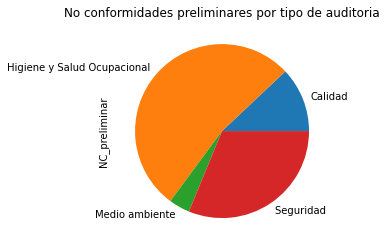

In [156]:
auditoriastodas = df.groupby(["Auditoria"])['NC_preliminar'].sum()
auditoriastodas = auditoriastodas.plot.pie()
plt.title('No conformidades preliminares por tipo de auditoria')


Text(0.5, 1.0, 'No conformidades tratadas por tipo de auditoria')

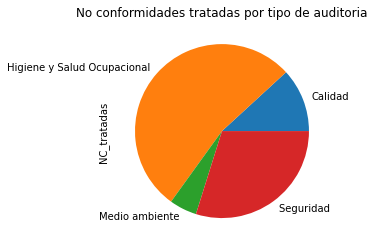

In [157]:
auditoriastodas = df.groupby(["Auditoria"])['NC_tratadas'].sum()
auditoriastodas = auditoriastodas.plot.pie()
plt.title('No conformidades tratadas por tipo de auditoria')


4.4 **¿Cúal auditoria tuvo mejores resultados?, ¿y la peor?**

1. Resultados de la auditoria calidad:  74 no conformidades durante el día de la auditoria y 30 definitivas, por lo tanto hubo una eficiencia de 41%.


2. Resultados de la auditoria seguridad:  No se pudo obtener el valor
 
3. Resultados de la auditoria medio ambiente: 24 no conformidades durante el día de la auditoria y 4 definitivas, por lo tanto hubo una eficiencia de 83%.
 
 
4. Resultados de la auditoria de Higiene y salud ocupacional: 325 no conformidades durante el día de la auditoria y 120 definitivas, por lo tanto hubo una eficiencia de 63%.

Por otra parte, las NC mas tratadas fueron las de Higiene y las menos de Medio ambiente, a pesar de que esta última sea la que menos NC mantiene.
 
**Respuesta: la auditoria con mejores resultados fue la de medio ambiente y con peores la de Higiene y Salud Ocupacional**


# 4.5 ¿Qué topicos auditados tuvieron mejores resultados?, ¿y los peores?

In [166]:
df.groupby(["Auditoria","Requisito"])['NC_preliminar'].sum()


Auditoria                    Requisito                                               
Calidad                      Auditorías                                                   8
                             Capacitación / Competencia                                  16
                             Comunicación Participación y Consulta                        0
                             Control Documental                                           0
                             Equipos, Vehículos y Herramientas                            8
                             Identificación de Riesgos y Oportunidades                   18
                             Preparación y Respuesta Ante Emergencias Operacionales       8
                             Productos y Servicios Suministrados Externamente             0
                             Requisitos Legales  / Operación                             13
                             Revisión por la Dirección                                

**Respuesta:**
1. Auditoria de Calidad: 
- Los requisitos con mejores resultados fueron "Satisfacción al cliente", "Comunicación, Participación y Consulta", "Control Documental" y "Productos y Servicios Suministrados Externamente". 
- Por otra parte, los peores requisitos auditados fueron: "Capacitación y Competencia", "Identificación de Riesgos y Oportunidades" y "Requisitos Legales".

2. Auditoria de Higiene y Salud Ocupacional:
- Los requisitos con mejores resultados fueron: "Exposición a frío", "Hipobaria" y "Vibraciones".
- Por otra parte, los peores requisitos auditados fueron: "Psicosocial", "Iluminación" y "Tmert".

3. Auditoria de Medio Ambiente:
- Los requisitos con mejores resultados fueron: "Residuos Peligrosos" y "Sustancias Peligrosas"
- Por otra parte, los peores requisitos auditados fueron: "Identificación Aspectos e Impactos Ambientales" y "Objetivos de Medio Ambiente"
A pesar de la comparación, el rango en esta auditoria es muy parecido.

4. Auditora de Seguridad:
- Los requisitos con mejores resultados fueron: "Riesgos de Fatalidad", "Identificacion Peligros y Evaluacion de Riesgos" y "Control Documental"
- Por otra parte, los peores requisitos auditados fueron: "Objetivos de Seguridad y Salud Ocupacional", "Comite paritario de higiene y seguridad" y "Comunicacion, participacion y consulta".
